In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(autoload_with=engine)


In [6]:
# View all of the classes that automap found
Base.classes.keys()


['measurement', 'station']

In [9]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [10]:
# Create our session (link) from Python to the DB
session = Session(bind=engine)

# Exploratory Precipitation Analysis

In [53]:
# Find the most recent date in the data set.
date_finder = session.query(Measurement.date)
date_finder_max = max(date_finder)
date_finder_max

('2017-08-23',)

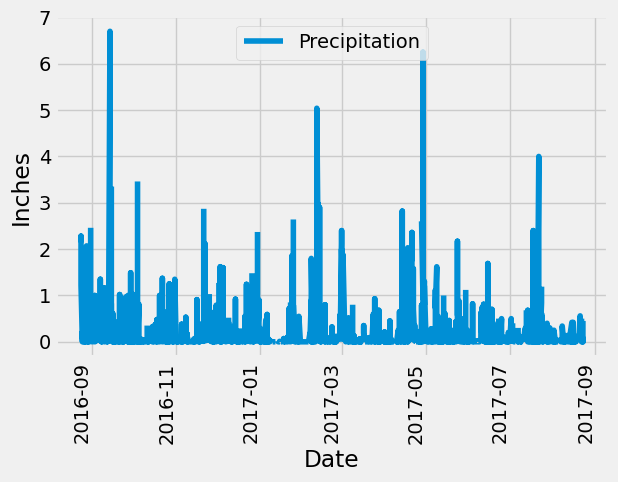

,Precipitation
Date,
2016-08-24,0.08
2016-08-25,0.08
2016-08-26,0.00
2016-08-27,0.00
2016-08-28,0.01
...,...
2017-08-19,0.09
2017-08-20,NaN
2017-08-21,0.56


In [86]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
max_date = dt.datetime.strptime(date_finder_max[0], "%Y-%m-%d" )

# Calculate the date one year from the last date in data set.
min_date = max_date - dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
prec_data = session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date <= max_date).\
    filter(Measurement.date >= min_date)

# Save the query results as a Pandas DataFrame. Explicitly set the column names
df = pd.DataFrame(prec_data, columns = ["Date", "Precipitation"])

# Sort the dataframe by date
df['Date'] = pd.to_datetime(df['Date'])
df.sort_values(by="Date")

# Use Pandas Plotting with Matplotlib to plot the data
df.set_index('Date', inplace=True)
df.plot()
plt.legend(loc=9)
plt.ylabel('Inches')
plt.tight_layout()
plt.xticks(rotation=90)
plt.show()


df

In [87]:
# Use Pandas to calculate the summary statistics for the precipitation data

df.describe()

,Precipitation
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [98]:
# Design a query to calculate the total number of stations in the dataset
station_count = session.query(Measurement.station).group_by(Measurement.station).count()
print(station_count)

9


In [110]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
station_data = session.query(Measurement.station, func.count(Measurement.station)).\
    group_by(Measurement.station).\
    order_by(func.count(Measurement.station).desc()).all()

station_data

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [132]:
# Using the most active station id from the previous query, calculate the lowest, 
# highest, and average temperature.
most_active = station_data[0][0]

most_active_data = session.query(func.min(Measurement.tobs), \
    func.max(Measurement.tobs),func.avg(Measurement.tobs) ).\
    filter(Measurement.station == most_active)

most_active_data[0]

(54.0, 85.0, 71.66378066378067)

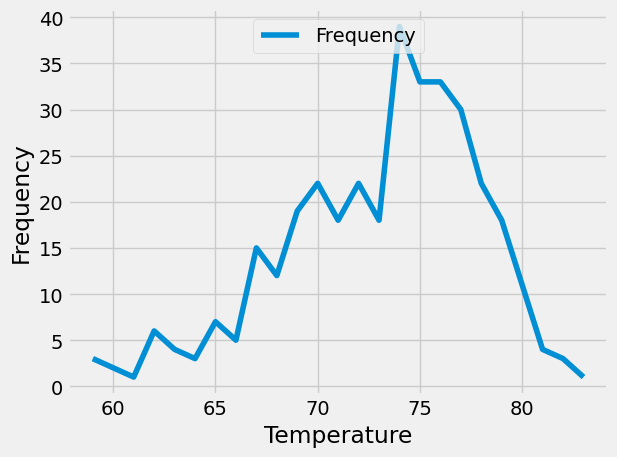

[(59.0, 3),
 (60.0, 2),
 (61.0, 1),
 (62.0, 6),
 (63.0, 4),
 (64.0, 3),
 (65.0, 7),
 (66.0, 5),
 (67.0, 15),
 (68.0, 12),
 (69.0, 19),
 (70.0, 22),
 (71.0, 18),
 (72.0, 22),
 (73.0, 18),
 (74.0, 39),
 (75.0, 33),
 (76.0, 33),
 (77.0, 30),
 (78.0, 22),
 (79.0, 18),
 (80.0, 11),
 (81.0, 4),
 (82.0, 3),
 (83.0, 1)]

In [146]:
# Using the most active station id
# Query the last 12 months of temperature observation data 
# for this station and plot the results as a histogram
most_active_data = session.query(Measurement.tobs, func.count(Measurement.tobs) ).\
    filter(Measurement.station == most_active).\
    filter(Measurement.date <= max_date).\
    filter(Measurement.date >= min_date).\
    group_by(Measurement.tobs).all()

dfma = pd.DataFrame(most_active_data, columns = ["Temperature", "Frequency"])


#dfma.set_index('Temperature', inplace=True)
dfma.plot("Temperature")
plt.legend(loc=9)
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

most_active_data

# Close Session

In [ ]:
# Close Session
session.close()